<a href="https://colab.research.google.com/github/rajitk13/csi-team-3-project/blob/main/one_month_bengaluru_lasso_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/drive/MyDrive/celebal internship/air quality index/bengaluru_aqi/one_month_bengaluru.csv')
df.head()

,aqi,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,16,101.0,2023-07-03:18,9.0,35.0,5.0,3.00,14.0,2023-07-03T23:30:00,2023-07-03T18:00:00,1688407200
1,16,108.0,2023-07-03:17,10.3,35.7,5.3,3.33,14.7,2023-07-03T22:30:00,2023-07-03T17:00:00,1688403600
2,17,115.0,2023-07-03:16,11.7,36.3,5.7,3.67,15.3,2023-07-03T21:30:00,2023-07-03T16:00:00,1688400000
3,17,122.0,2023-07-03:15,13.0,37.0,6.0,4.00,16.0,2023-07-03T20:30:00,2023-07-03T15:00:00,1688396400
4,19,117.3,2023-07-03:14,11.7,41.3,6.7,4.33,15.0,2023-07-03T19:30:00,2023-07-03T14:00:00,1688392800


<Axes: >

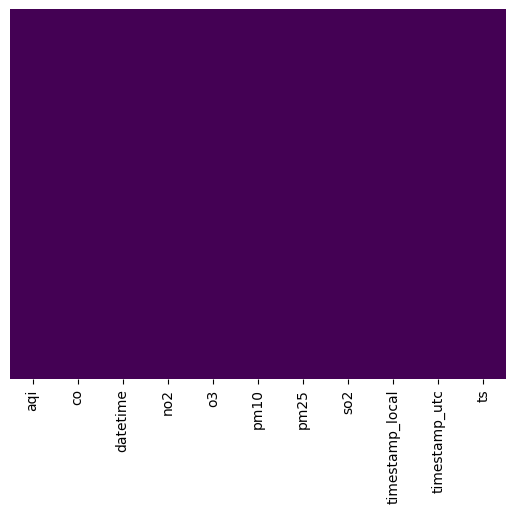

In [4]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df=df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   aqi              721 non-null    int64  
 1   co               721 non-null    float64
 2   datetime         721 non-null    object 
 3   no2              721 non-null    float64
 4   o3               721 non-null    float64
 5   pm10             721 non-null    float64
 6   pm25             721 non-null    float64
 7   so2              721 non-null    float64
 8   timestamp_local  721 non-null    object 
 9   timestamp_utc    721 non-null    object 
 10  ts               721 non-null    int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 62.1+ KB


In [7]:
y=df.iloc[:,0] ## dependent features
y

0      16
1      16
2      17
3      17
4      19
       ..
716    64
717    63
718    70
719    77
720    85
Name: aqi, Length: 721, dtype: int64

In [8]:
df.columns

Index(['aqi', 'co', 'datetime', 'no2', 'o3', 'pm10', 'pm25', 'so2',
       'timestamp_local', 'timestamp_utc', 'ts'],
      dtype='object')

In [9]:
X=df[['co', 'datetime', 'no2', 'o3', 'pm10', 'pm25', 'so2',
       'timestamp_local', 'timestamp_utc', 'ts']] ## independent features

In [10]:
X

,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,101.0,2023-07-03:18,9.0,35.0,5.0,3.00,14.0,2023-07-03T23:30:00,2023-07-03T18:00:00,1688407200
1,108.0,2023-07-03:17,10.3,35.7,5.3,3.33,14.7,2023-07-03T22:30:00,2023-07-03T17:00:00,1688403600
2,115.0,2023-07-03:16,11.7,36.3,5.7,3.67,15.3,2023-07-03T21:30:00,2023-07-03T16:00:00,1688400000
3,122.0,2023-07-03:15,13.0,37.0,6.0,4.00,16.0,2023-07-03T20:30:00,2023-07-03T15:00:00,1688396400
4,117.3,2023-07-03:14,11.7,41.3,6.7,4.33,15.0,2023-07-03T19:30:00,2023-07-03T14:00:00,1688392800
...,...,...,...,...,...,...,...,...,...,...
716,130.3,2023-06-03:22,5.0,85.3,27.0,18.33,15.3,2023-06-04T03:30:00,2023-06-03T22:00:00,1685829600
717,130.0,2023-06-03:21,5.0,88.0,27.0,18.00,15.0,2023-06-04T02:30:00,2023-06-03T21:00:00,1685826000
718,144.3,2023-06-03:20,7.3,88.7,31.7,21.33,17.3,2023-06-04T01:30:00,2023-06-03T20:00:00,1685822400
719,158.7,2023-06-03:19,9.7,89.3,36.3,24.67,19.7,2023-06-04T00:30:00,2023-06-03T19:00:00,1685818800


In [11]:
X.isnull()

,co,datetime,no2,o3,pm10,pm25,so2,timestamp_local,timestamp_utc,ts
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
716,False,False,False,False,False,False,False,False,False,False
717,False,False,False,False,False,False,False,False,False,False
718,False,False,False,False,False,False,False,False,False,False
719,False,False,False,False,False,False,False,False,False,False


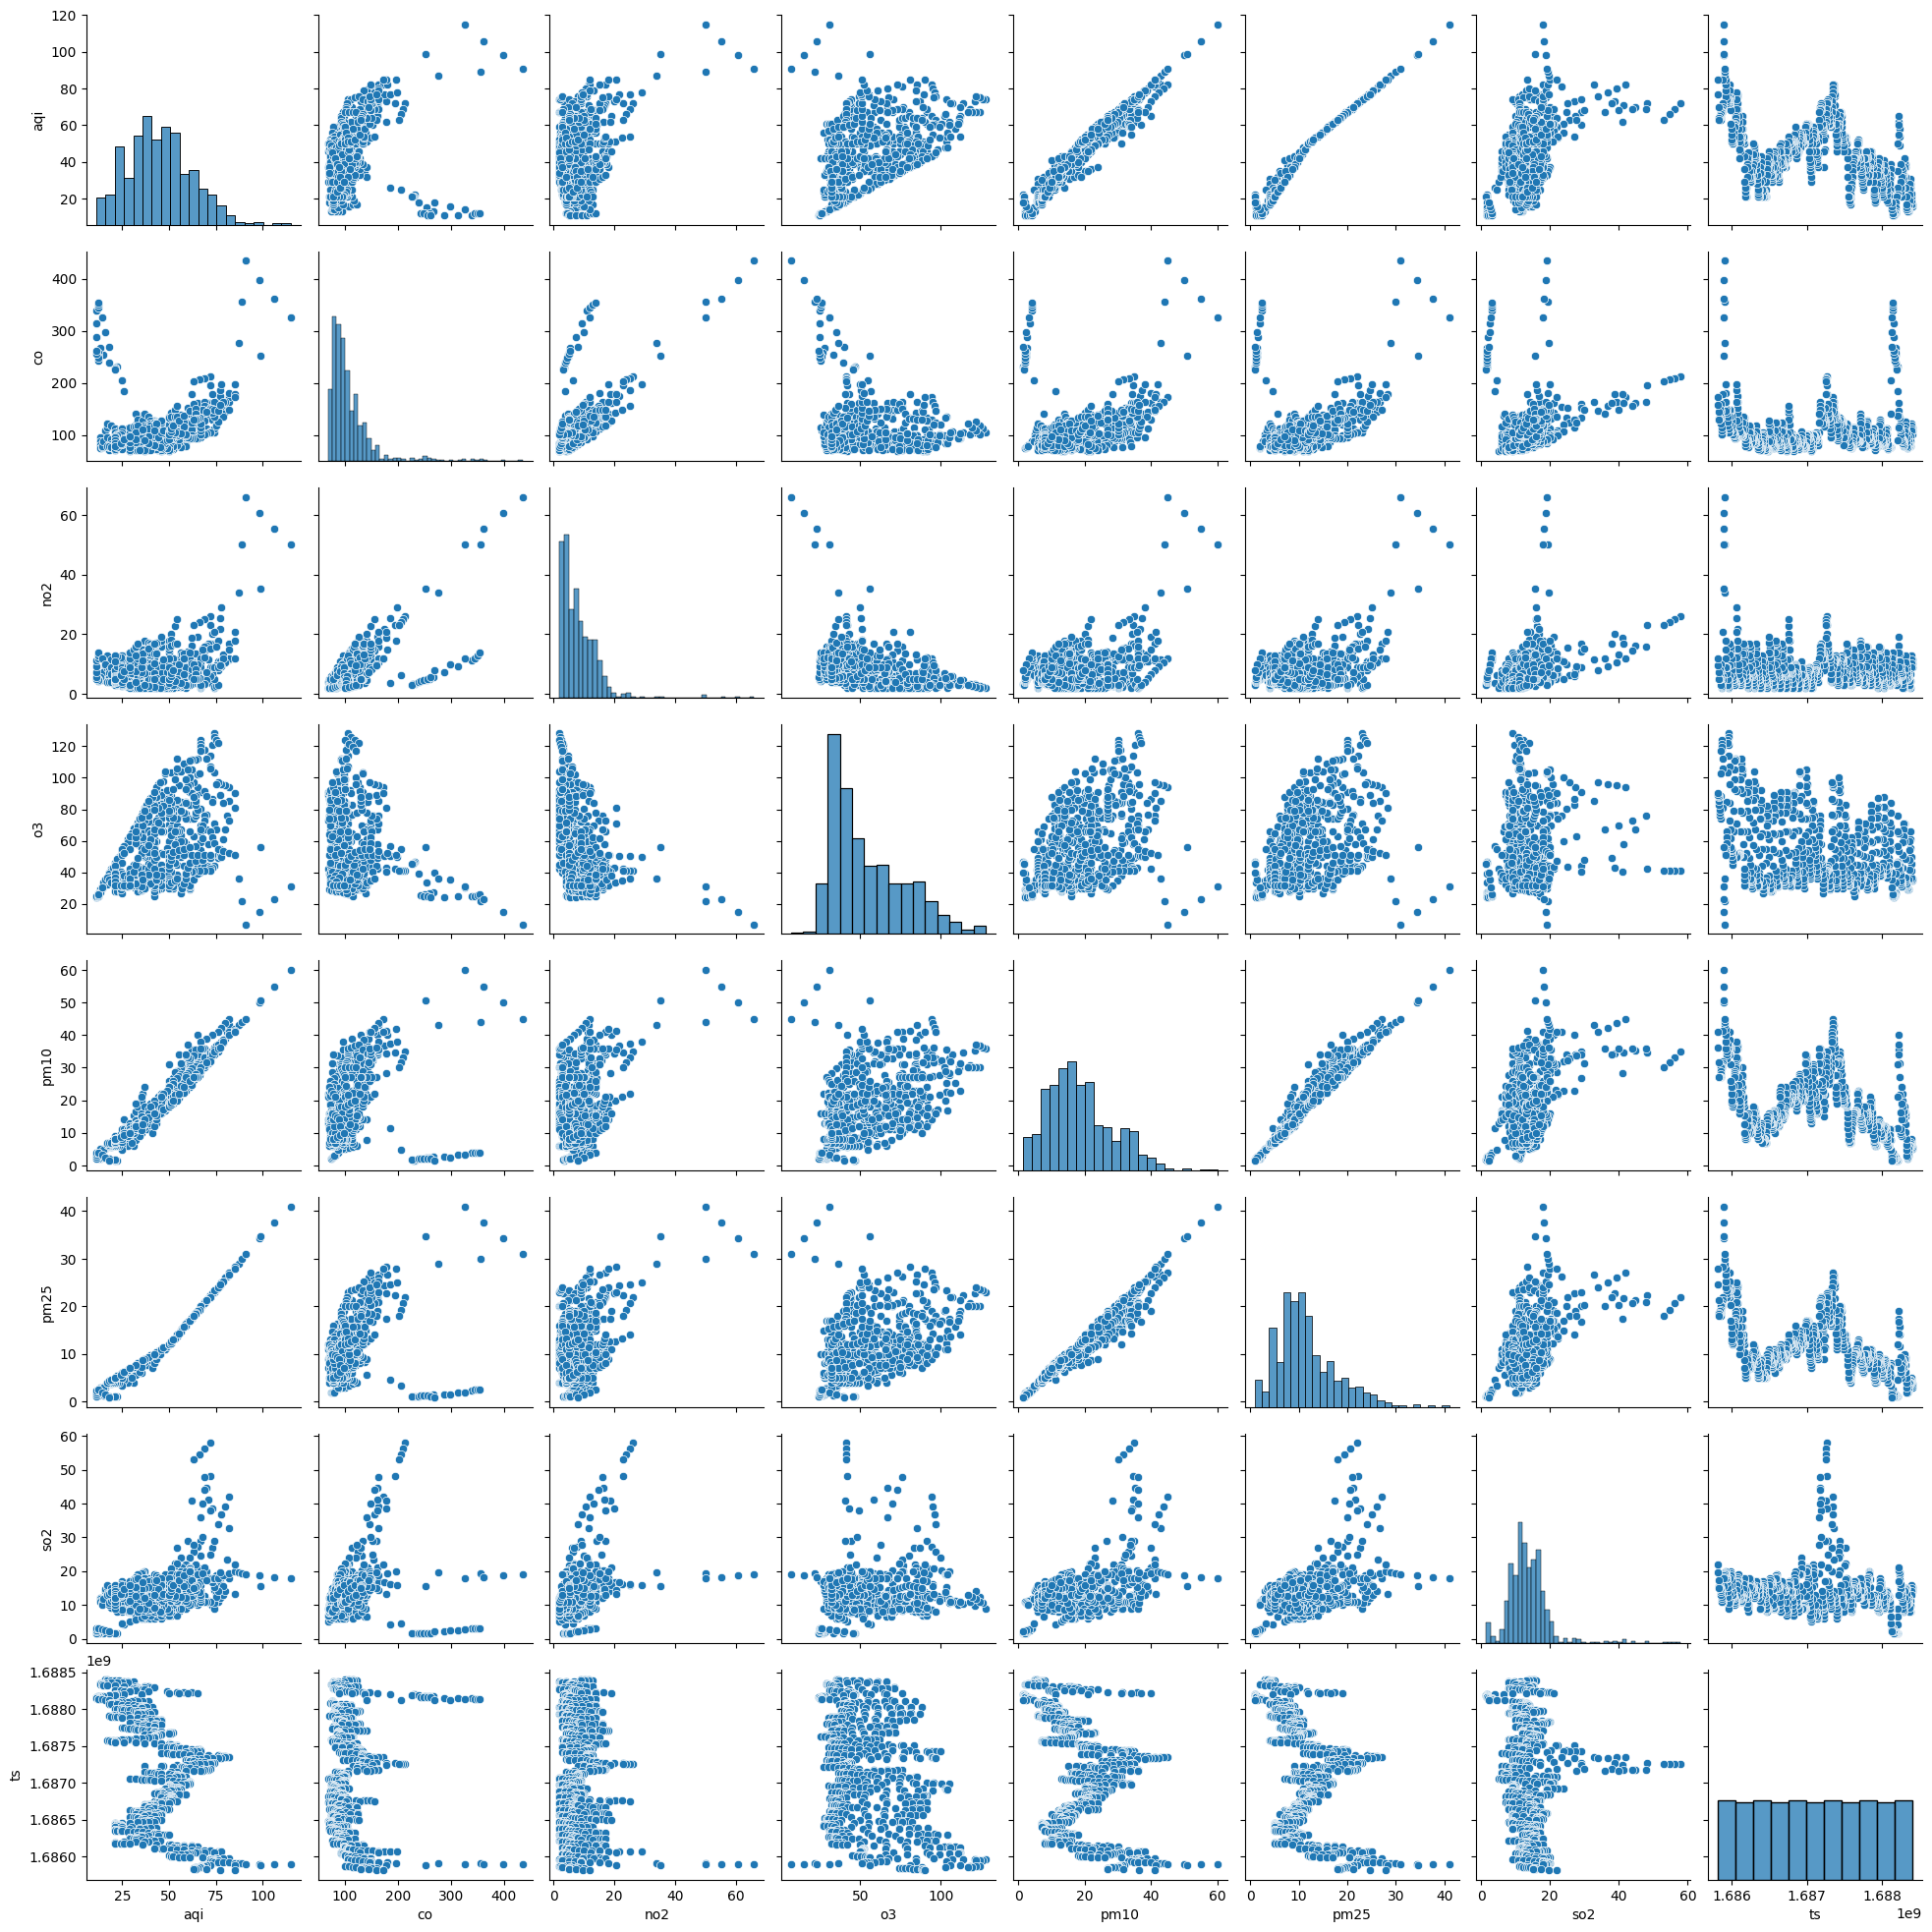

In [12]:
sns.pairplot(df)

In [13]:
df.corr()

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,aqi,co,no2,o3,pm10,pm25,so2,ts
aqi,1.000000,0.252273,0.375885,0.437718,0.968103,0.982336,0.421962,-0.456851
co,0.252273,1.000000,0.651793,-0.209573,0.251570,0.316237,0.162173,0.015811
no2,0.375885,0.651793,1.000000,-0.386479,0.343267,0.439771,0.435654,-0.114676
o3,0.437718,-0.209573,-0.386479,1.000000,0.438816,0.393982,0.024421,-0.322822
pm10,0.968103,0.251570,0.343267,0.438816,1.000000,0.971072,0.449472,-0.389017
pm25,0.982336,0.316237,0.439771,0.393982,0.971072,1.000000,0.458602,-0.452224
so2,0.421962,0.162173,0.435654,0.024421,0.449472,0.458602,1.000000,-0.121020
ts,-0.456851,0.015811,-0.114676,-0.322822,-0.389017,-0.452224,-0.121020,1.000000


<ipython-input-14-eb5df078eb6c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


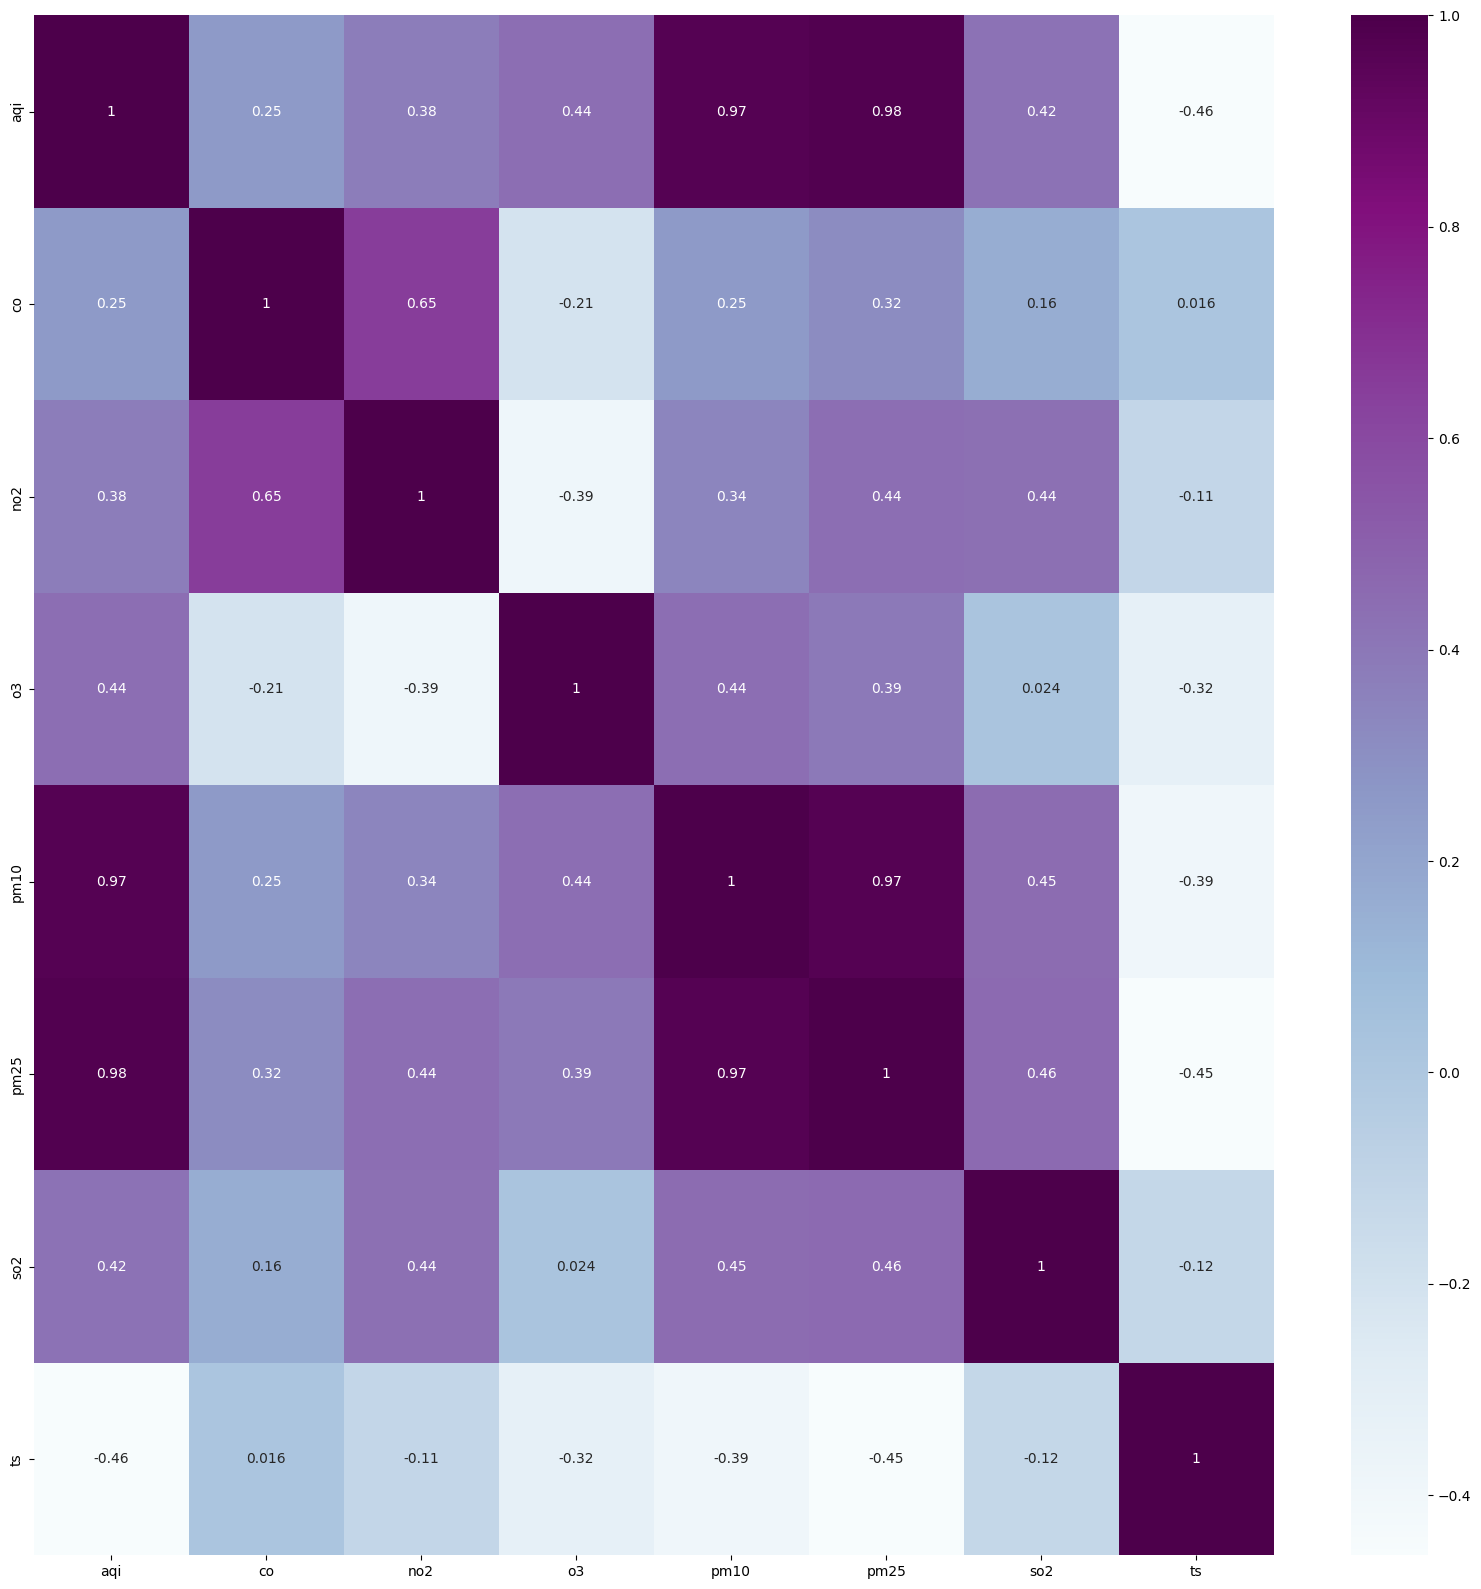

In [14]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="BuPu")

In [15]:
corrmat.index

Index(['aqi', 'co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'ts'], dtype='object')

In [16]:
X = X.drop(['datetime'],axis=1)
X = X.drop(['timestamp_local'],axis=1)
X = X.drop(['timestamp_utc'],axis=1)
X.head()

,co,no2,o3,pm10,pm25,so2,ts
0,101.0,9.0,35.0,5.0,3.00,14.0,1688407200
1,108.0,10.3,35.7,5.3,3.33,14.7,1688403600
2,115.0,11.7,36.3,5.7,3.67,15.3,1688400000
3,122.0,13.0,37.0,6.0,4.00,16.0,1688396400
4,117.3,11.7,41.3,6.7,4.33,15.0,1688392800


In [17]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

[0.0162876  0.00607137 0.01379245 0.44541895 0.46756508 0.00581149
 0.04505307]


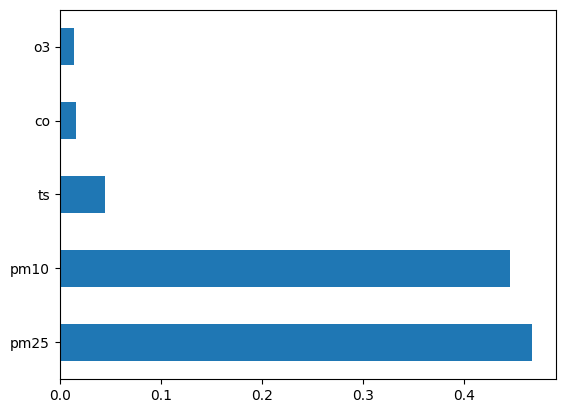

In [18]:
X.head()

print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [21]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-17.059451530573


In [22]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.968e+03, tolerance: 1.416e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.399e+03, tolerance: 1.924e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.510e+03, tolerance: 1.708e

{'alpha': 1}
-15.509976389709232


<ipython-input-23-62201203c3f4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


<Axes: xlabel='aqi', ylabel='Density'>

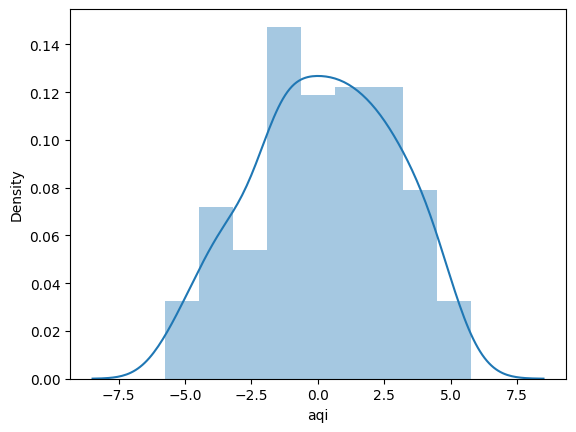

In [23]:
prediction=lasso_regressor.predict(X_test)
sns.distplot(y_test-prediction)

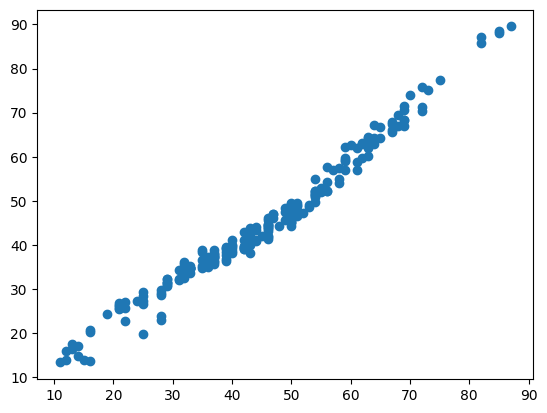

In [24]:
plt.scatter(y_test,prediction)

In [25]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 2.214359879589998
MSE: 7.074518128375297
RMSE: 2.6597966328979545
